<a href="https://colab.research.google.com/github/EstherKim0306/Kaggle-Boston-Housing/blob/main/Kaggle%20Boston%20Houning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

판다스 설치, 파일 삽입, 파일 헤드 삽입

In [ ]:
import pandas as pd
df = pd.read_csv("/content/housing.csv")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info() #비어있지 않은 갯수 non-null count 전체수와 비교해서 같으면 결측없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


경도(longitude), 위도(latitude)

total_bedrooms 결측치 존재 (20433/20640) /  ocean_proximity 문자열 object  


In [ ]:
df['ocean_proximity'].value_counts()
#안에 들어있는 고유값 갯수 알려줌

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
# prompt: "ocean_proximity" 열을 원핫인코딩해줘

# 원핫인코딩 #범주형 자료를 수치형 자료로 바꿈
df = pd.get_dummies(df, columns=['ocean_proximity'])
df.rename(columns={'ocean_proximity_<1H OCEAN': 'ocean_proximity_1H OCEAN'},inplace=True) #열이름에 부등호가있으면 안되서 이름 바꿔주는 작업
df["population_per_households"]=df["population"]/df["households"]  #한집당가족수  #필드확장_to 성능향상  #RMSE rsquard 조금씩 좋아짐
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,population_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False,2.181467


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
       'population_per_households'],
      dtype='object')

In [ ]:
'''
one_hot_encoded = pd.get_dummies(df['ocean_proximity'])
df = pd.concat([df, one_hot_encoded], axis=1)
df=df.drop('ocean_proximity', axis=1 )
df.head()
'''

"\none_hot_encoded = pd.get_dummies(df['ocean_proximity'])\ndf = pd.concat([df, one_hot_encoded], axis=1)\ndf=df.drop('ocean_proximity', axis=1 )\ndf.head()\n"

In [ ]:
# prompt: "median_house_value" 가 타겟 값이야. 타겟데이터와 피처데이터로 구분해줘

target = df['median_house_value']
features = df.drop('median_house_value', axis=1)
#df는 테이블형 데이터인데 axis 축정보(열)을 버릴게(drop)

In [ ]:
# prompt: train data와 test data 로 나눠줘 근데 test data 사이즈는 20%로 해줘

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# prompt: 'ocean_proximity_<1H OCEAN'  열 이름을 'ocean_proximity_1H OCEAN'  바꿔줘

# 열 이름 변경
#df.rename(columns={'ocean_proximity_<1H OCEAN': 'ocean_proximity_1H OCEAN'},inplace=True)

In [ ]:
# prompt: xgboost 활용해서 모델을 만들어서 rmse값과 r-square 값을 계산해서 성능을 측정해줘

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# XGBoost 모델 생성 및 학습
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# R-squared 계산
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

RMSE: 47160.33537223362
R-squared: 0.8302745731025752


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,population_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False,2.181467


오류메세지 : feature_names(독립변수) must be string, and may not contain [, ] or <

ocean_proximity 원핫인코딩한거( ocean_proximity_<1H OCEAN	)가 문제가 되는것

'ocean_proximity_<1H OCEAN'  열 이름을 'ocean_proximity_1H OCEAN'  바꿔줘 -> 그래서 이걸 넣어봄

df = df.rename(columns={'ocean_proximity_<1H OCEAN': 'ocean_proximity_1H OCEAN'})

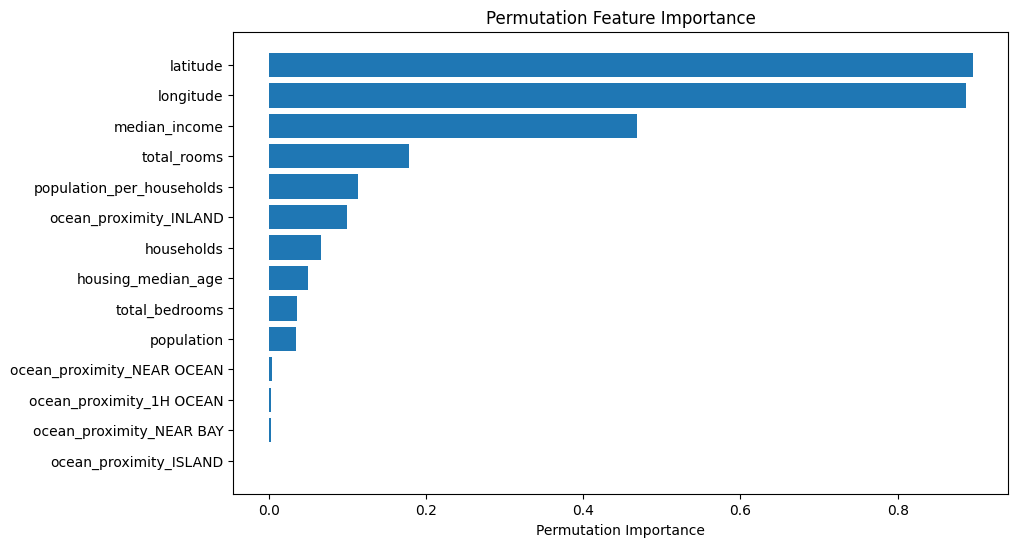

In [ ]:
# prompt: PFI 그래프 sklearn의 inspection 모듈을 이용해 그려줘 plt.barh를 이용해 그려줘

import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Permutation Feature Importance 계산
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# 중요도 순으로 정렬
sorted_idx = result.importances_mean.argsort()

# plt.barh를 이용하여 PFI 그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance")
plt.show()

#ourput(집값)을 예측해 내는데 영향이 미치는 큰 순서를 나타냄
#변수들을 랜덤으로 섞고 다시 측정했을때 (섞기 전의 성능과 비교해서) 성능이 확 떨어지면(차이가 너무 커지면 = 그래프 길이가 길어지면) 그 변수는 집값(결과값)에 중요한 것임

집값에 있어 longitude	latitude 위치, median_income	중위소득 등이 중요한 역할을 한다

In [ ]:
!pip install shap

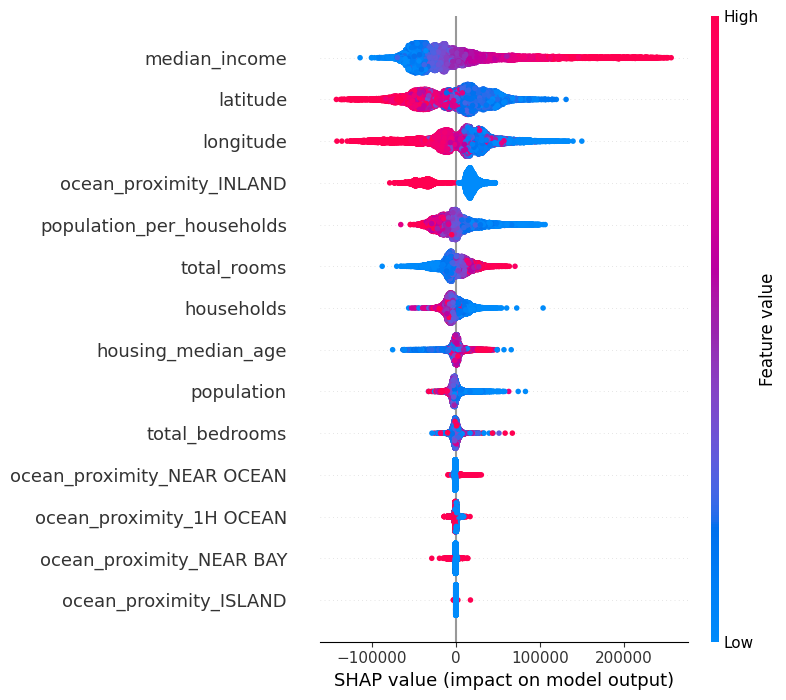

In [ ]:
# prompt: shap그래프를 그려줘
import shap

# SHAP 값 계산
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)

# SHAP summary plot 생성
shap.summary_plot(shap_values, X_train)

# SHAP dependence plot 생성 (예시: 'median_income' 변수)
#shap.dependence_plot('median_income', shap_values.values, X_train)

In [ ]:
# prompt: force_plot을 그려줘
shap.initjs()

# SHAP force plot 생성 (예시: 첫 번째 데이터 포인트)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])



water fall plot - 샘플하나

값 올리려는 영향력 행사하는 변수 | 값을 낮추려는 영향을 행사하는 변수

base value에서 시작해서 엎지찰 뒤치락해서 117,579.49 에 도달 (longitude나 다른 쪽 힘이 더 커서 base 보다 낮게 형성)

In [ ]:
# prompt: force_plot을 그려줘
shap.initjs()

# SHAP force plot 생성 (예시: 첫 번째 데이터 포인트)
shap.force_plot(explainer.expected_value, shap_values[0:500,:], X_train.iloc[0:500,:])

water fall plot를 여러개하여 새로로 쌓아 올린 그래프

실제 내가 가지는 데이터들의 비슷한 것들을 모은것 --이런것으로--> ex) 10만달러 친구들을 모아봐서 어떠한 트렌트를 알 수 있음

빨, 파 사이에서 집값이 형성되고있다



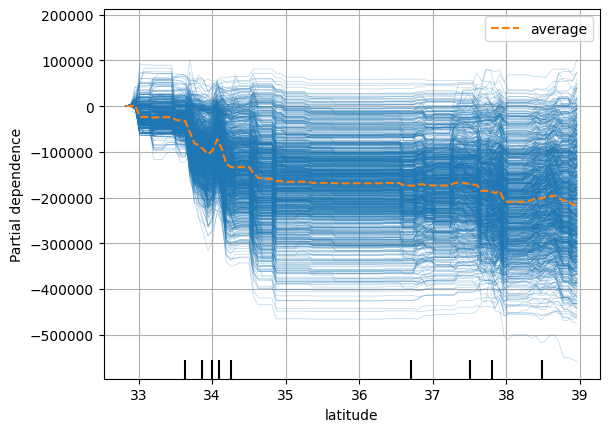

In [ ]:
# prompt: Inspection 모듈을 사용해서 PartialDependencesidplay 를 이용해서 "latitude"를 그려줘 #pdp plot #ice plt

from sklearn.inspection import PartialDependenceDisplay

# Partial Dependence Plot 생성 (예시: 'latitude' 변수)
display = PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=['latitude'],
    kind="both",
    centered = 1
)

# Plot 표시
plt.grid()
plt.show()

(다른 값 고정하고) latitude만 33, 34, 35 같이 다르게 줘서 나온 집값 예측

33.5 기점으로 output 떨어짐
/ 34.8 기점에서는 일직선 등등등

퍼지면서 내려가는 형태 - > latitude 값만 집값에 영향을 준게 아님 / 분산이 큼
-> 집값을 낮추는 경향이 있지만, 다른 변수에 어떤값이 있느냐에 따라서 집값이 달라짐 -> 결국은 shap 그래프의 세로 두께와 귀결



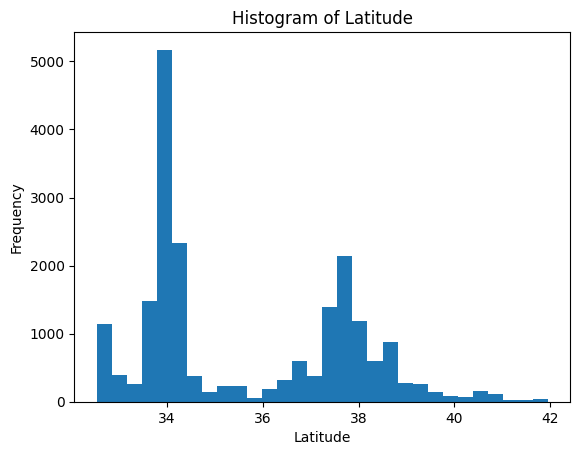

In [ ]:
# prompt: "latitude"의 히스토그램 그려줘

plt.hist(df['latitude'], bins=30)
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Histogram of Latitude')
plt.show()

밑에 직선은 데이터분포를 나타내는데 34.5 에서 37.5까지 데이터의 양(빈도)이 적기때문에 신뢰성과 관련하여 고민해야함 만약 정규분포마냥 데이터의 양이 많으면 신뢰할 수 있음 그래서 데이터빈도표도 같이 봐야함

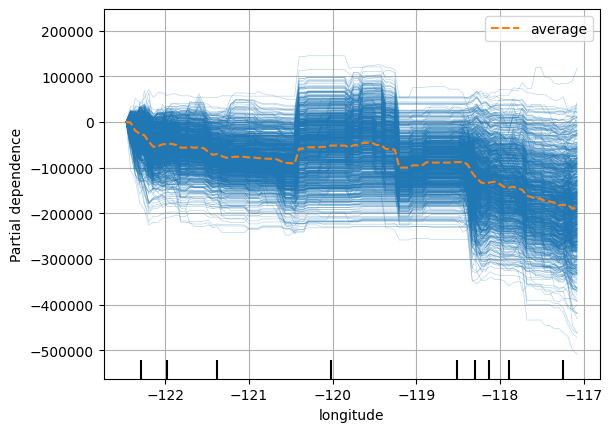

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Partial Dependence Plot 생성 (예시: 'longitude' 변수)
display = PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=['longitude'],
    kind="both",
    centered = 1
)

# Plot 표시
plt.grid()
plt.show()

꺾이는 곳 주목

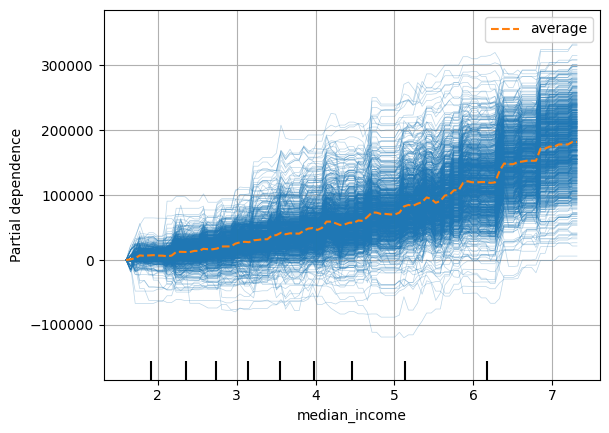

In [ ]:
# prompt: Inspection 모듈을 사용해서 PartialDependencesidplay 를 이용해서 "median_income"를 그려줘

from sklearn.inspection import PartialDependenceDisplay

# Partial Dependence Plot 생성 (예시: 'median_income' 변수)
display = PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=['median_income'],
    kind="both",
    centered = 1
)

# Plot 표시
plt.grid()
plt.show()

shap plt에서 양의 상관관계

shap plt에서
latitude가 퍼지는 것 보다 median_income의 변화가 적음 -> median_income이 증가하면 다른 변수에 어떤 값이 들어가있든지 말든지 집값은 증가 -> shap plt에서 median income 세로 굵기와 귀결

ICE plt과 shap plt 꼭 같이 보면 이해가 잘 된다.

